# Индивидуальное задание

Нарисовать многоугольник в месте, где нужно выделить фрагмент. Вывести изобржение с выделенным фрагментом. И вывести изображение повернутое на 90 градусов и приближенное в центр.

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

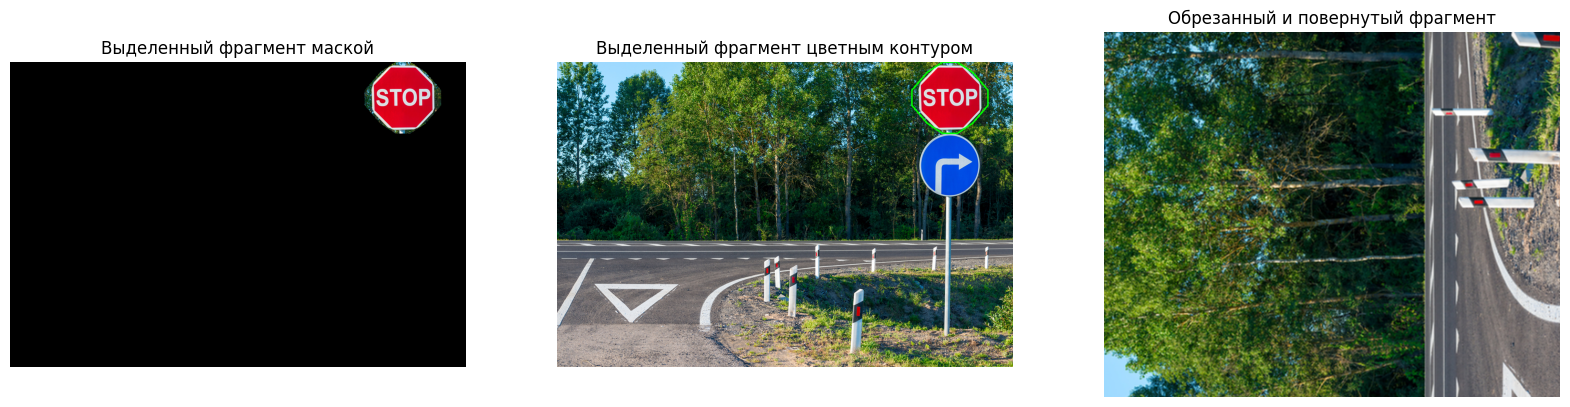

In [112]:
img = cv2.imread('image.jpg')

# Определение вершин многоугольника
pts = np.array([[90, 115], [120, 80], [150, 60], [180, 60], [210, 80], [240, 115], [240, 145], 
                [210, 180], [180, 200], [150, 200], [120, 180], [90, 145]])
pts[:,0] += 610 # Смещение по горизонтали
pts[:, 1] -= 60 # Смещение по вертикали

# Применение маски к изображению
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.fillPoly(mask, [pts], 255)
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Поворот и обрезка изображения
rows,cols,colors = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
rotated_img = cv2.warpAffine(img,M,(cols,rows))
crop = rotated_img[150:550, 150:650]

# Вывод изображений на экран
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Выделенный фрагмент маской')

plt.subplot(1, 3, 2)
# Отрисовка многоугольника на изображении
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.polylines(img, [pts], True, (0, 255, 0), thickness=2))
plt.axis('off')
plt.title('Выделенный фрагмент цветным контуром')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Обрезанный и повернутый фрагмент')

plt.show()